In [49]:
!pip install langchain openai

LangChain Nedir?

Tipik bir büyük dil modeline sahip olduğunuzda, onunla etkileşim kurmanın yolu bir soru sormaktır ve bir yanıt alırsınız. Ama dünyanın geri kalanından oldukça izoledir.
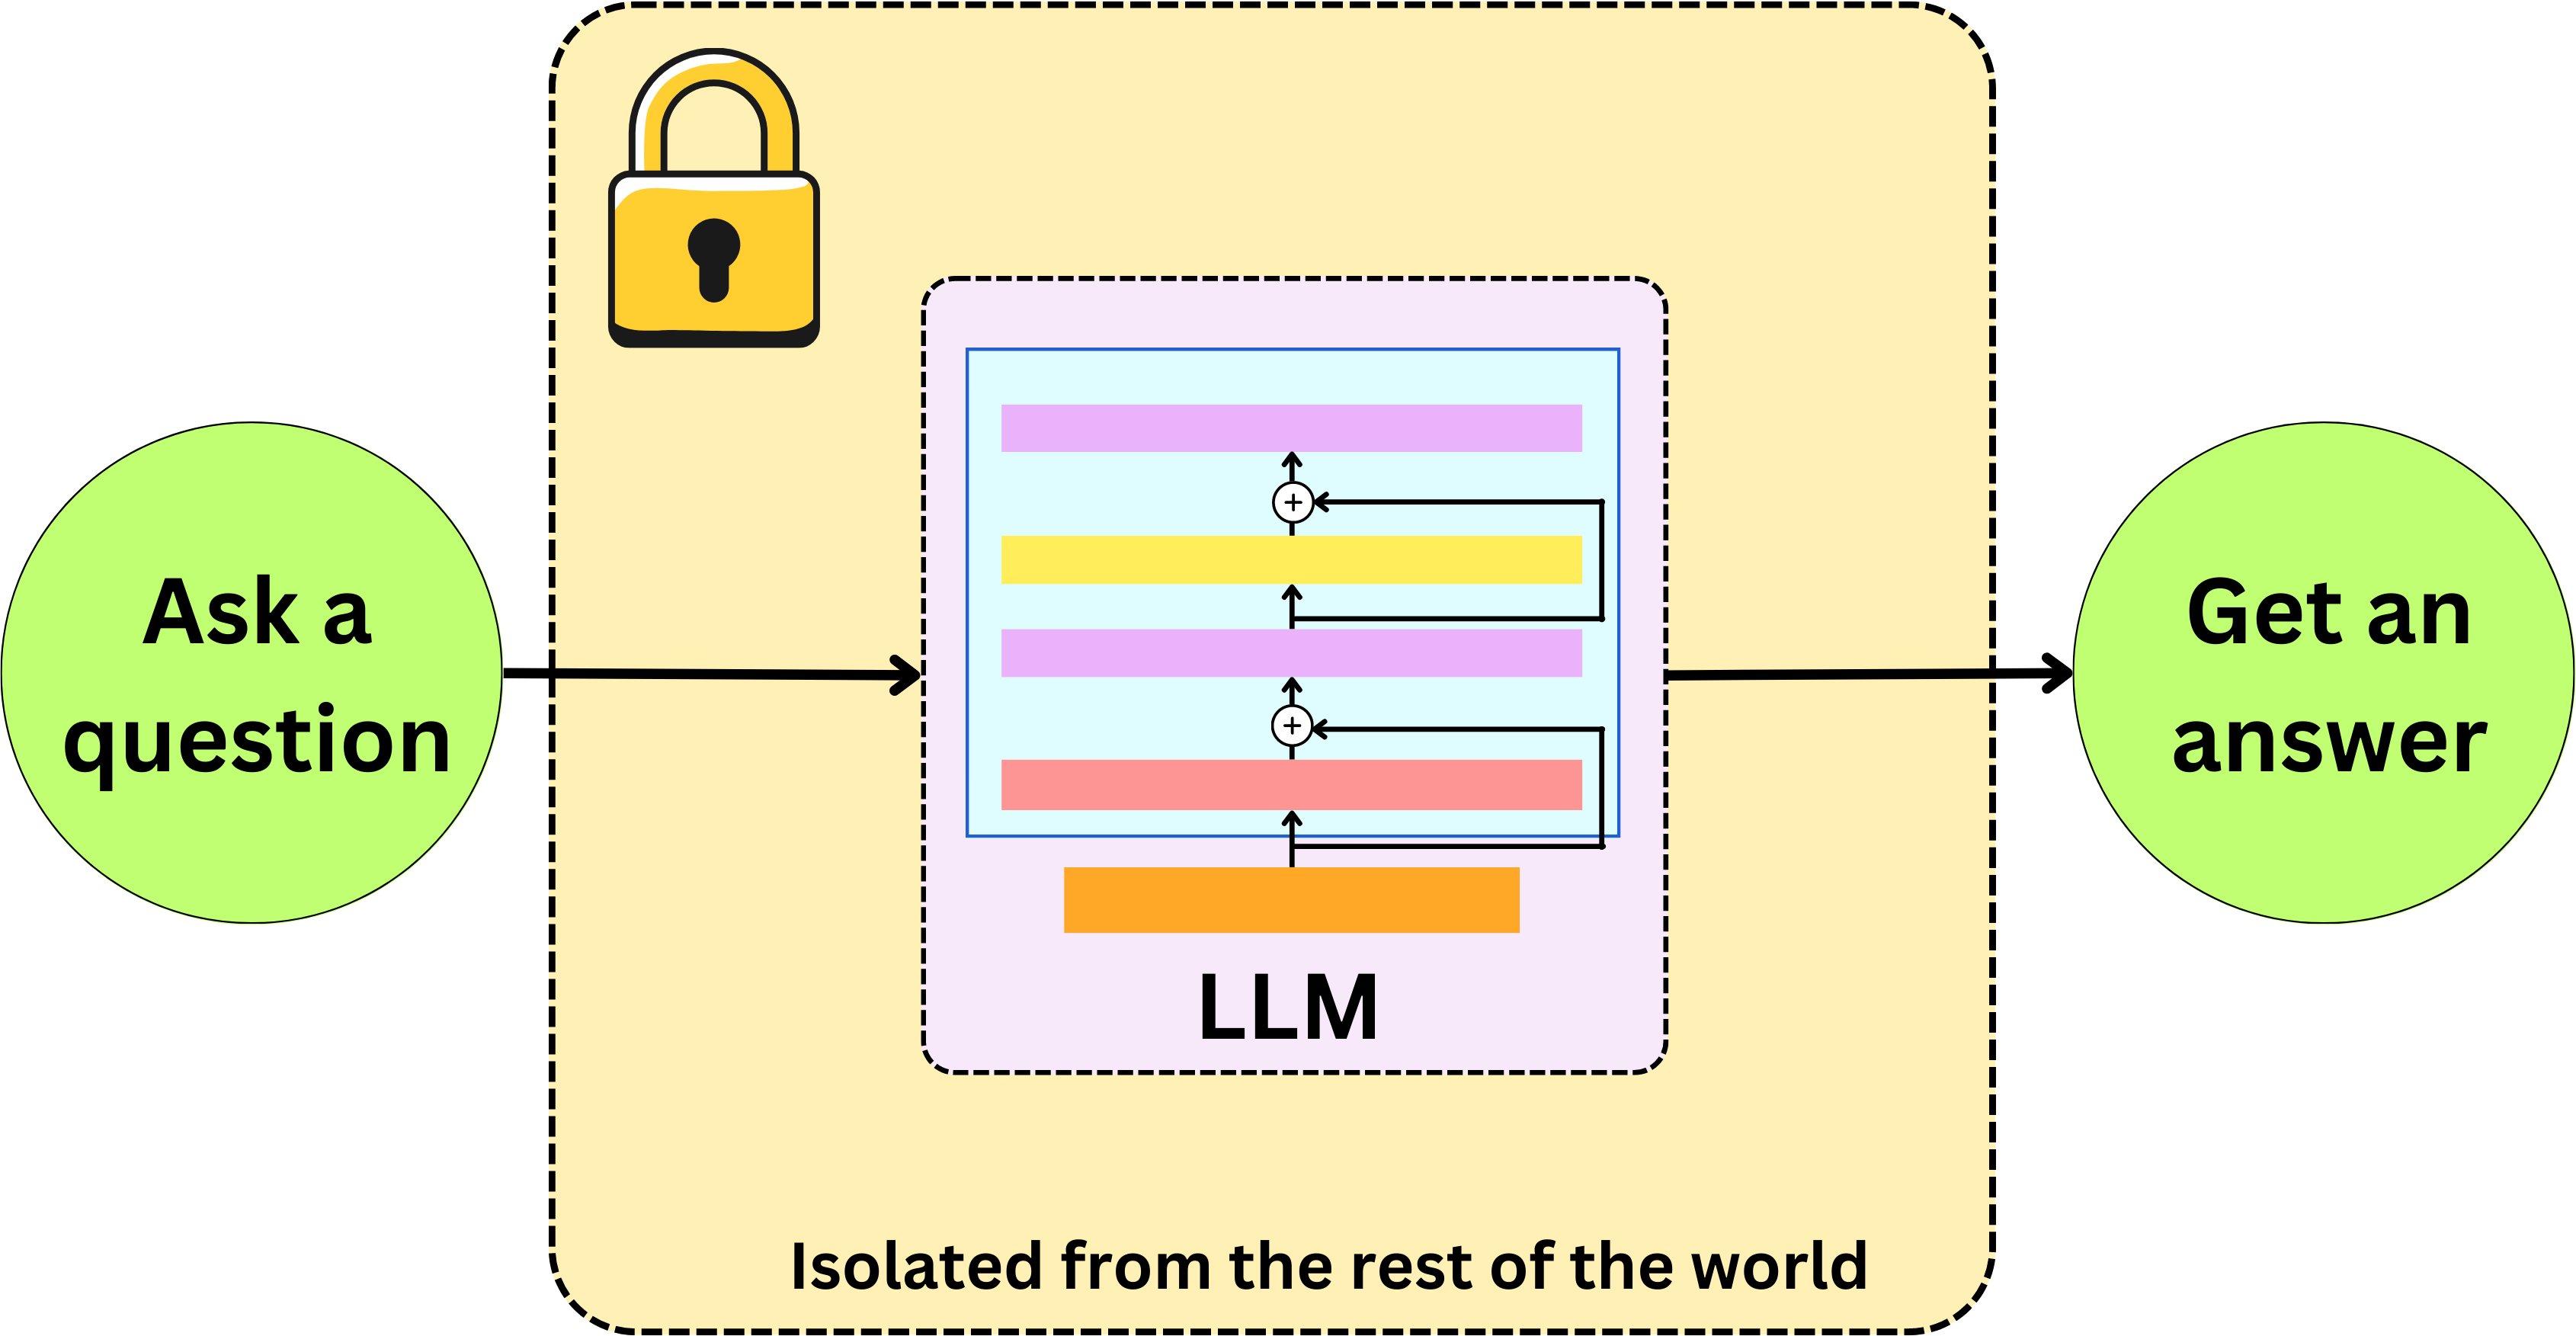

Dolayısıyla uygulamalar geliştirmek istiyorsanız büyük dil modelinizi verilere bağlamak isteyebilirsiniz. Araçlara erişmesine izin vermek isteyebilirsiniz. Bellek erişimi vermek isteyebilirsiniz. Hızlı mühendislik sürecini otomatikleştirmek isteyebilirsiniz. LangChain, yazılım uygulamaları oluşturmak için tüm bu farklı yönleri birleştirmenize olanak tanır.
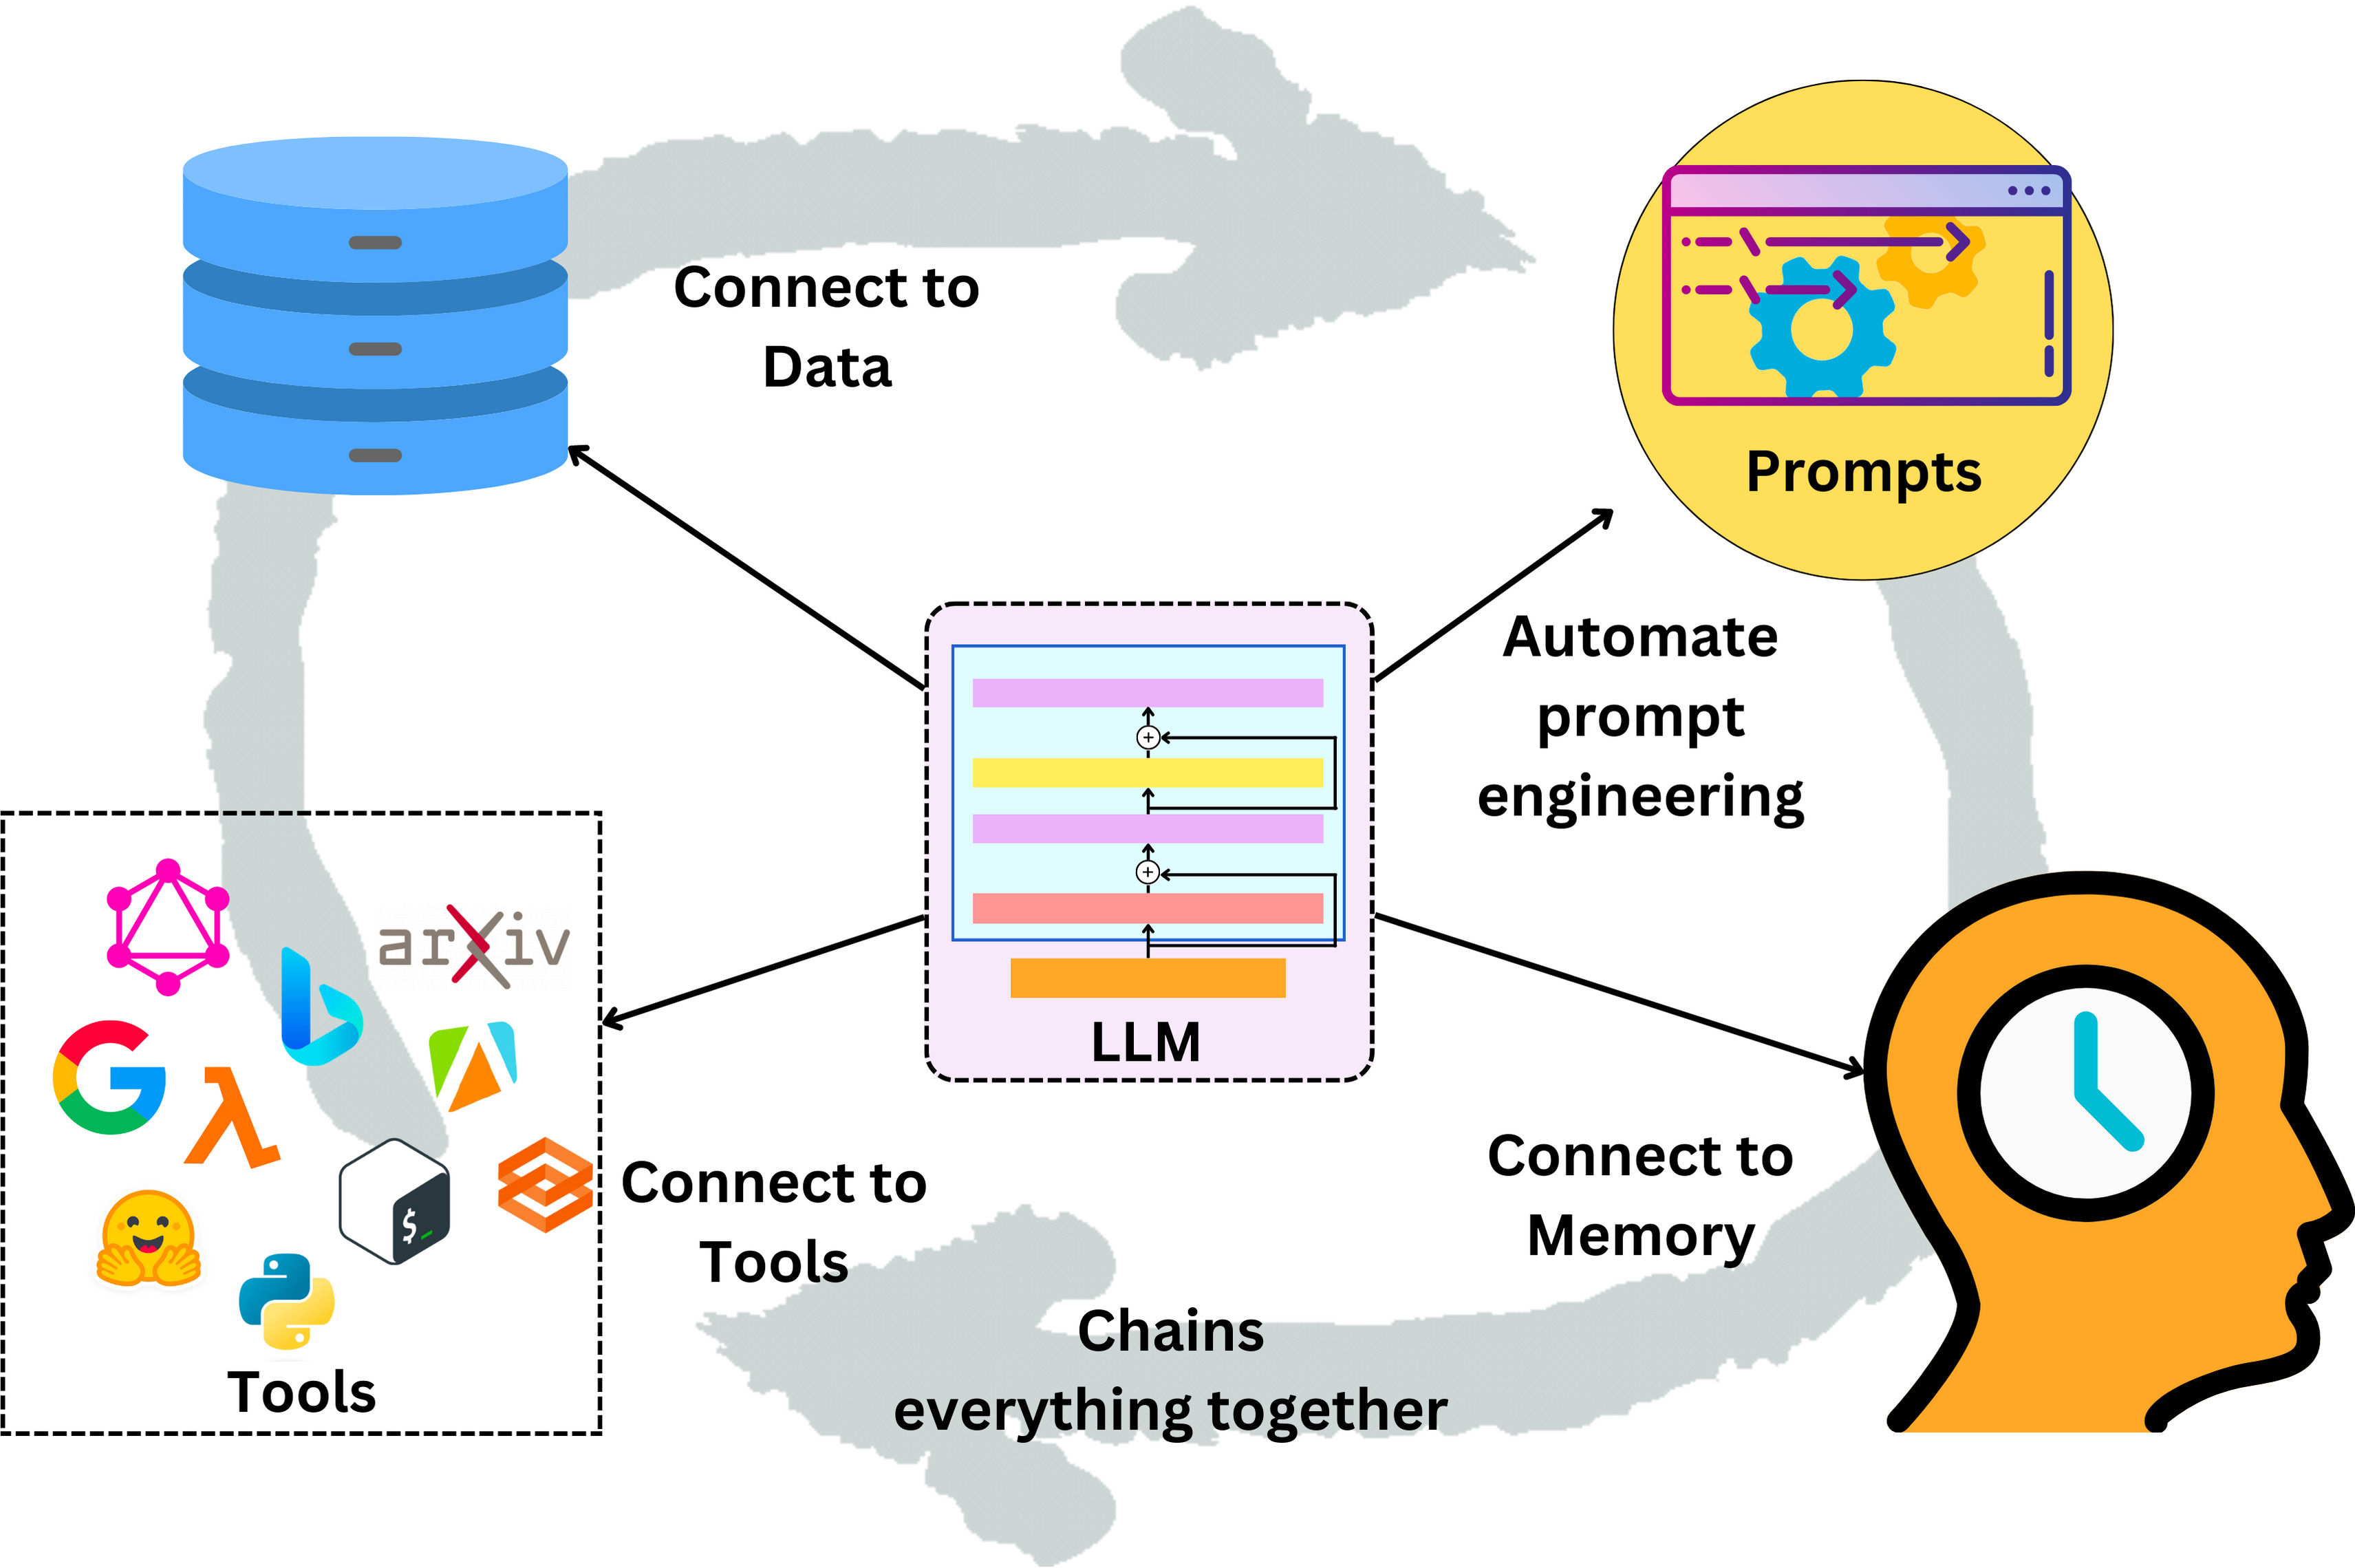

In [50]:
import os
os.environ["OPENAI_API_KEY"]="Your Openai Key"

In [51]:
import openai

openai.__version__

'0.28.1'

In [52]:
!pip install -U openai==0.28.1

In [53]:
!pip install langchain_community

In [54]:
import langchain
langchain.__version__

'0.2.3'

In [55]:
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
llm=OpenAI()

In [57]:
llm.predict("How are you?")

AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

In [58]:
chat_model=ChatOpenAI()
chat_model.predict("How are you?")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

**Chains**

In [59]:
from langchain.chains import ConversationChain

chain = ConversationChain(
    llm=chat_model,
    verbose=True
)

chain.run('How are you today?')

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: How are you today?
AI:


AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

In [60]:
chain.run('What was my previous question?')



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: What was my previous question?
AI:


AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

**Prompt Templetes**

In [61]:
from langchain.prompts import PromptTemplate

template = """
Return all the subcategories of the following category

{category}
"""

prompt = PromptTemplate(
    input_variables=['category'],
    template=template
)

'Kategori', zinciri çalıştırdığımızda kullanılacak bir giriş değişkenidir. Bunu bir zincire girelim. Kullanabileceğimiz en basit zincir olan LLMChain'i kullanıyoruz

In [62]:
from langchain.chains import LLMChain

chain = LLMChain(
    llm=chat_model,
    prompt=prompt,
    verbose=True
)

chain.run('Machine Learning')

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(




> Entering new LLMChain chain...
Prompt after formatting:

Return all the subcategories of the following category

Machine Learning



AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

Ayrıca istemleri sistem ve insan istemleri olarak da ayırabiliriz. Bu, sohbet robotları oluşturduğumuzda faydalıdır

In [63]:
from langchain.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate
)

system_template = """
You are a helpful assistant who generate comma separated lists.
A user will only pass a category and you should generate subcategories of that category in a comma separated list.
ONLY return comma separated and nothing more!
"""

human_template = '{category}'

system_message = SystemMessagePromptTemplate.from_template(
    system_template
)

human_message = HumanMessagePromptTemplate.from_template(
    human_template
)

Ve 2 istemi tek bir istemde birleştirebiliriz:

In [64]:
prompt = ChatPromptTemplate.from_messages([
    system_message, human_message
])

chain = LLMChain(
    llm=chat_model,
    prompt=prompt,
    verbose=True
)


chain.run('Machine Learning')



> Entering new LLMChain chain...
Prompt after formatting:
System: 
You are a helpful assistant who generate comma separated lists.
A user will only pass a category and you should generate subcategories of that category in a comma separated list.
ONLY return comma separated and nothing more!

Human: Machine Learning


AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

**Output Parser**

In [65]:
from langchain.schema import BaseOutputParser
class CommaSeparatedParser(BaseOutputParser):
    def parse(self, text):
        output = text.strip().split(',')
        output = [o.strip() for o in output]
        return output

chain = LLMChain(
    llm=chat_model,
    prompt=prompt,
    output_parser=CommaSeparatedParser(),
    verbose=True
)
chain.run('Machine Learning')



> Entering new LLMChain chain...
Prompt after formatting:
System: 
You are a helpful assistant who generate comma separated lists.
A user will only pass a category and you should generate subcategories of that category in a comma separated list.
ONLY return comma separated and nothing more!

Human: Machine Learning


AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

Zinciri birden fazla girdiyle de besleyebiliriz:

In [66]:
input_list = [
    {'category': 'food'},
    {'category': 'country'},
    {'category': 'colors'}
]
response = chain.apply(input_list)



> Entering new LLMChain chain...
Prompt after formatting:
System: 
You are a helpful assistant who generate comma separated lists.
A user will only pass a category and you should generate subcategories of that category in a comma separated list.
ONLY return comma separated and nothing more!

Human: food
Prompt after formatting:
System: 
You are a helpful assistant who generate comma separated lists.
A user will only pass a category and you should generate subcategories of that category in a comma separated list.
ONLY return comma separated and nothing more!

Human: country
Prompt after formatting:
System: 
You are a helpful assistant who generate comma separated lists.
A user will only pass a category and you should generate subcategories of that category in a comma separated list.
ONLY return comma separated and nothing more!

Human: colors


AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

In [67]:
response[2]['text']

NameError: name 'response' is not defined

**Simple Sequence**

Ayrıca zincirler de oluşturabiliriz. Burada, bir zincirin çıktısının bir sonraki zincirin girdisi olarak kullanıldığı zincirlerden oluşan bir boru hattı oluşturuyoruz. İki zincir oluşturuyoruz: Bir oyun yazma sürecini otomatikleştirmek için bir başlık zinciri ve bir özet. Öncelikle bir başlık zincirimiz var:

title_template = """Siz bir yazarsınız. Bir konu verildiğinde

In [68]:
title_template = """You are a writer. Given a subject, your job is to return a fun title for a play.Subject: {subject}Title:"""
title_chain = LLMChain.from_string(
    llm=chat_model,
    template=title_template
)
title_chain.run('Machine Learning')

AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

In [69]:
synopsis_template = """You are a writer. Given a title, write a synopsis for a play.Title: {title}Synopsis:"""
synopsis_chain = LLMChain.from_string(
    llm=chat_model,
    template=synopsis_template
)
title = "The Algorithmic Adventure: A Machine Learning Marvel"
synopsis_chain.run(title)

AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

In [70]:
from langchain.chains import SimpleSequentialChain
chain = SimpleSequentialChain(
    chains=[title_chain, synopsis_chain],
    verbose=True
)
chain.run('Machine Learning')



> Entering new SimpleSequentialChain chain...


AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

#**Doküman Yükleme ve Özetleme**



* langchain
* openai
* tqdm: library to show the progress of an action (downloading, training, ...)
* jq: lightweight and flexible JSON processor
* unstructured: A library that prepares raw documents for downstream ML tasks
* pypdf: A pure-python PDF library capable of splitting, merging, cropping, and transforming PDF files
* tiktoken: a fast open-source tokenizer by OpenAI.

In [71]:
!pip install langchain openai tqdm jq unstructured pypdf tiktoken

**Doküman yükleme**

In [72]:
from langchain.document_loaders.csv_loader import CSVLoader
file_path = "/content/drive/MyDrive/langchain/countries.csv"
csv_loader = CSVLoader(file_path=file_path)
weather_data = csv_loader.load()

In [73]:
weather_data

[Document(page_content='country: Afghanistan\nnative_name: افغانستان\niso2: AF\niso3: AFG\npopulation: 26023100.0\narea: 652230.0\ncapital: Kabul\ncapital_lat: 34.526011\ncapital_lng: 69.177684\nregion: Southern and Central Asia\ncontinent: Asia', metadata={'source': '/content/drive/MyDrive/langchain/countries.csv', 'row': 0}),
 Document(page_content='country: Albania\nnative_name: Shqipëria\niso2: AL\niso3: ALB\npopulation: 2895947.0\narea: 28748.0\ncapital: Tirana\ncapital_lat: 41.326873\ncapital_lng: 19.818791\nregion: Southern Europe\ncontinent: Europe', metadata={'source': '/content/drive/MyDrive/langchain/countries.csv', 'row': 1}),
 Document(page_content='country: Algeria\nnative_name: الجزائر\niso2: DZ\niso3: DZA\npopulation: 38700000.0\narea: 2381741.0\ncapital: Algiers\ncapital_lat: 36.775361\ncapital_lng: 3.060188\nregion: Northern Africa\ncontinent: Africa', metadata={'source': '/content/drive/MyDrive/langchain/countries.csv', 'row': 2}),
 Document(page_content='country: Am

In [74]:
weather_data[0].page_content

'country: Afghanistan\nnative_name: افغانستان\niso2: AF\niso3: AFG\npopulation: 26023100.0\narea: 652230.0\ncapital: Kabul\ncapital_lat: 34.526011\ncapital_lng: 69.177684\nregion: Southern and Central Asia\ncontinent: Asia'

In [75]:
import pandas as pd

df=pd.read_csv(file_path)

df.head()

country     native_name iso2 iso3  population       area    capital  \
0     Afghanistan       افغانستان   AF  AFG  26023100.0   652230.0      Kabul   
1         Albania       Shqipëria   AL  ALB   2895947.0    28748.0     Tirana   
2         Algeria         الجزائر   DZ  DZA  38700000.0  2381741.0    Algiers   
3  American Samoa  American Samoa   AS  ASM     55519.0      199.0  Pago Pago   
4          Angola          Angola   AO  AGO  24383301.0  1246700.0     Luanda   

   capital_lat  capital_lng                     region continent  
0    34.526011    69.177684  Southern and Central Asia      Asia  
1    41.326873    19.818791            Southern Europe    Europe  
2    36.775361     3.060188            Northern Africa    Africa  
3   -14.275479  -170.704830                  Polynesia   Oceania  
4    -8.827270    13.243951             Central Africa    Africa

In [ ]:
from langchain.document_loaders import PyPDFLoader

sl_loader = PyPDFLoader("/content/drive/MyDrive/langchain/ESLII_print12_toc.pdf")
sl_data = sl_loader.load_and_split()

In [ ]:
sl_data[0]

In [ ]:
len(sl_data)

In [ ]:
from langchain.text_splitter import (
    CharacterTextSplitter,
    RecursiveCharacterTextSplitter
)
# split on "\n\n"
splitter1 = CharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=0,
)
# split ["\n\n", "\n", " ", ""]
splitter2 = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=0,
)
sl_data1 = sl_loader.load_and_split(text_splitter=splitter1)
sl_data2 = sl_loader.load_and_split(text_splitter=splitter2)

In [ ]:
len(sl_data1[600].page_content)

In [ ]:
len(sl_data2[1].page_content)

In [ ]:
from langchain.chains.summarize import load_summarize_chain
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI()
chain = load_summarize_chain(
    llm=llm,
    chain_type='stuff'
)
chain.run(sl_data[:2])

In [ ]:
chain.run(sl_data[:20])

In [ ]:
chain.llm_chain.prompt.template

In [ ]:
from langchain.prompts import PromptTemplate
template = """Write a concise summary of the following in spanish:"{text}"CONCISE SUMMARY IN SPANISH:"""
prompt = PromptTemplate.from_template(template)
chain = load_summarize_chain(
    llm=llm,
    prompt=prompt
)
chain.run(sl_data[:2])

**“Harita azaltımı” zinciri**


Çok fazla veriyi özetlemek istediğimizde Harita azaltma stratejisini kullanabiliriz. Verileri birden çok parçaya bölüyoruz, her parçayı özetliyoruz ve birleştirilmiş özetleri son bir "birleştirme" adımında özetliyoruz:

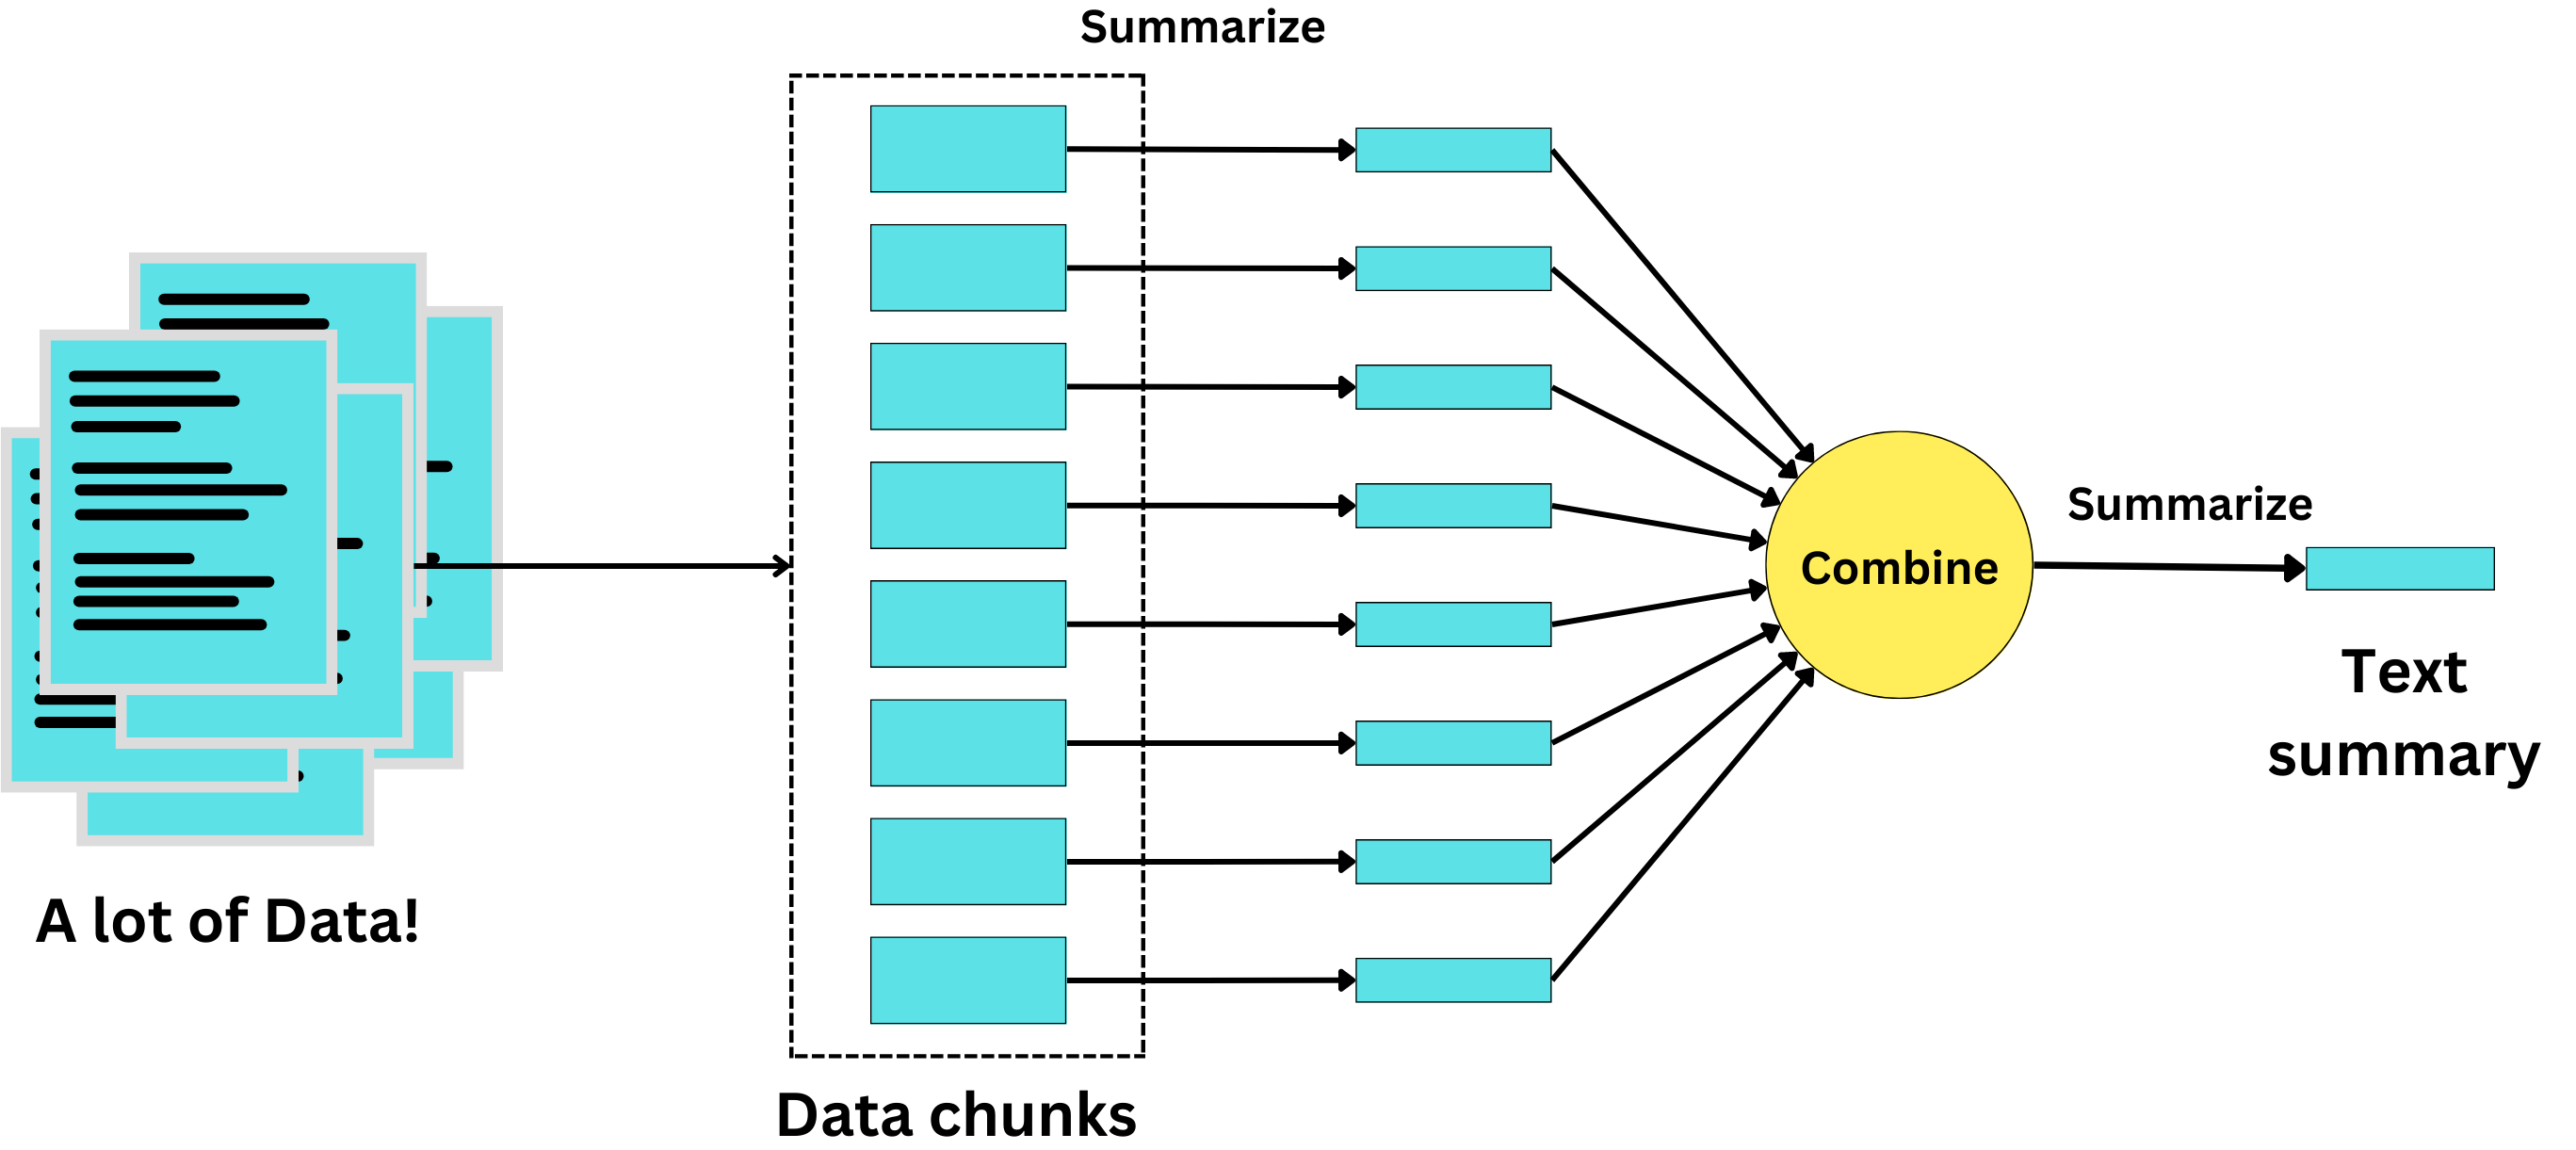

In [ ]:
chain = load_summarize_chain(
    llm=llm,
    chain_type='map_reduce',
)
chain.run(sl_data[:20])

In [ ]:
chain.llm_chain.prompt.template

In [ ]:
chain.combine_document_chain.llm_chain.prompt.template

In [ ]:
map_template = """The following is a set of documents{text}Based on this list of docs, please identify the main themes Helpful Answer:"""
combine_template = """The following is a set of summaries:{text}Take these and distill it into a final, consolidated list of the main themes. Return that list as a comma separated list. Helpful Answer:"""
map_prompt = PromptTemplate.from_template(map_template)
combine_prompt = PromptTemplate.from_template(combine_template)
chain = load_summarize_chain(
    llm=llm,
    chain_type='map_reduce',
    map_prompt=map_prompt,
    combine_prompt=combine_prompt,
    verbose=True
)
chain.run(sl_data[:20])

In [ ]:
chain = load_summarize_chain(
    llm=llm,
    chain_type='refine',
    verbose=True
)
chain.run(sl_data[:20])

In [ ]:
chain.initial_llm_chain.prompt.template

In [ ]:
chain.refine_llm_chain.prompt.template

In [ ]:
initial_template = """Extract the most relevant themes from the following:{text}THEMES:"""
refine_template = """Your job is to extract the most relevant themesWe have provided an existing list of themes up to a certain point: {existing_answer}We have the opportunity to refine the existing list(only if needed) with some more context below.------------{text}------------Given the new context, refine the original listIf the context isn't useful, return the original list and ONLY the original list.Return that list as a comma separated list.LIST:"""
initial_prompt = PromptTemplate.from_template(initial_template)
refine_prompt = PromptTemplate.from_template(refine_template)
chain = load_summarize_chain(
    llm=llm,
    chain_type='refine',
    question_prompt=initial_prompt,
    refine_prompt=refine_prompt,
    verbose=True
)
chain.run(sl_data[:20])

#**Prompt Engineering**

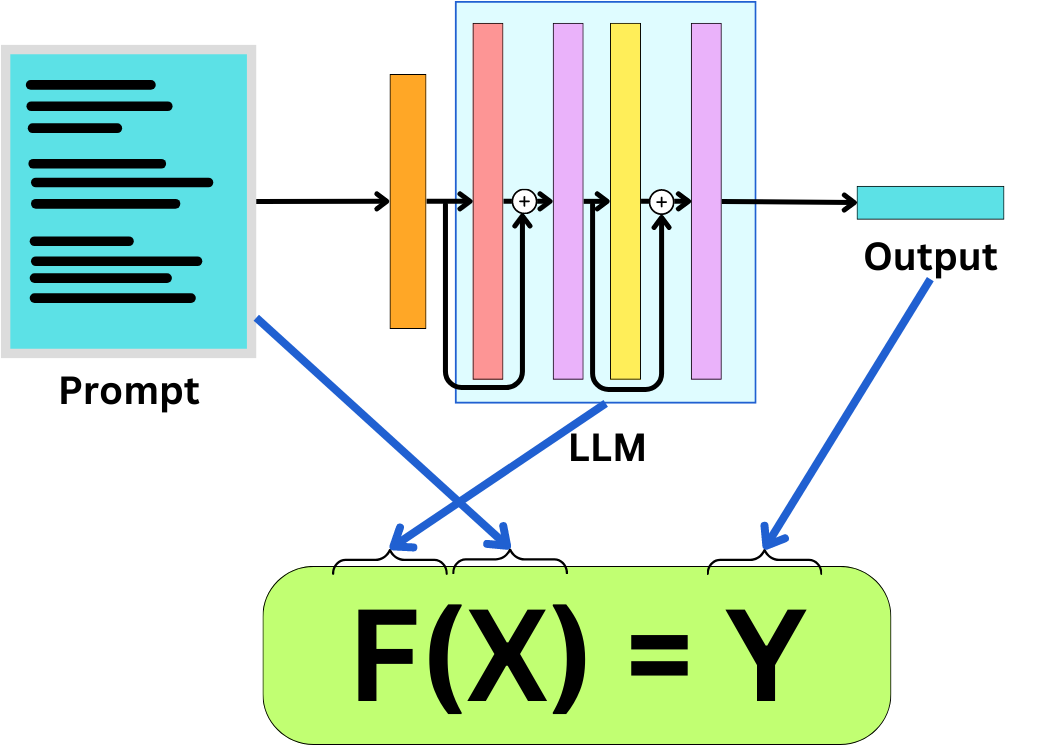

In [76]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
chat_model = ChatOpenAI()
conversation_chain = ConversationChain(
    llm=chat_model
)
conversation_chain.prompt.template

'The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\n{history}\nHuman: {input}\nAI:'

#**Few shot Learning**

In [77]:
from langchain.prompts import (
    FewShotChatMessagePromptTemplate,
    ChatPromptTemplate,
)
examples = [
    {"input": "2+2", "output": "4"},
    {"input": "2+3", "output": "5"},
    {"input": "5+6", "output": "11"},
]
example_prompt = ChatPromptTemplate.from_messages(
    [
        ("human", "{input}"),
        ("ai", "{output}"),
    ]
)
few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)
print(few_shot_prompt.format())

Human: 2+2
AI: 4
Human: 2+3
AI: 5
Human: 5+6
AI: 11


In [78]:
final_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are wonderous wizard of math."),
        few_shot_prompt,
        ("human", "{input}"),
    ]
)
print(final_prompt.format(input='What is 3+3?'))

System: You are wonderous wizard of math.
Human: 2+2
AI: 4
Human: 2+3
AI: 5
Human: 5+6
AI: 11
Human: What is 3+3?


In [79]:
from langchain.chains import LLMChain
chain = LLMChain(
    llm=chat_model,
    prompt=final_prompt,
    verbose=True
)
chain.run("What is 3+3?")



> Entering new LLMChain chain...
Prompt after formatting:
System: You are wonderous wizard of math.
Human: 2+2
AI: 4
Human: 2+3
AI: 5
Human: 5+6
AI: 11
Human: What is 3+3?


AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

# Memetic Proxy

In [80]:
from langchain.prompts import PromptTemplate
template = """System: {reference}Provide an helpful answer to the following questionHuman: {question}AI:"""
prompt = PromptTemplate.from_template(template)
chain = LLMChain(
    llm=chat_model,
    prompt=prompt,
    verbose=True
)
high_level = "Imagine you are a Professor teaching at the PhD level."
lower_level = "Imagine you are a Kindergarten teacher."
question = "What is Quantum Mechanics"
chain.run({
    'question': question,
    'reference': high_level
})



> Entering new LLMChain chain...
Prompt after formatting:
System: Imagine you are a Professor teaching at the PhD level.Provide an helpful answer to the following questionHuman: What is Quantum MechanicsAI:


AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

In [81]:
chain.run({
    'question': question,
    'reference': lower_level
})



> Entering new LLMChain chain...
Prompt after formatting:
System: Imagine you are a Kindergarten teacher.Provide an helpful answer to the following questionHuman: What is Quantum MechanicsAI:


AuthenticationError: Incorrect API key provided: Your Ope*** Key. You can find your API key at https://platform.openai.com/account/api-keys.

# Chain of Thought

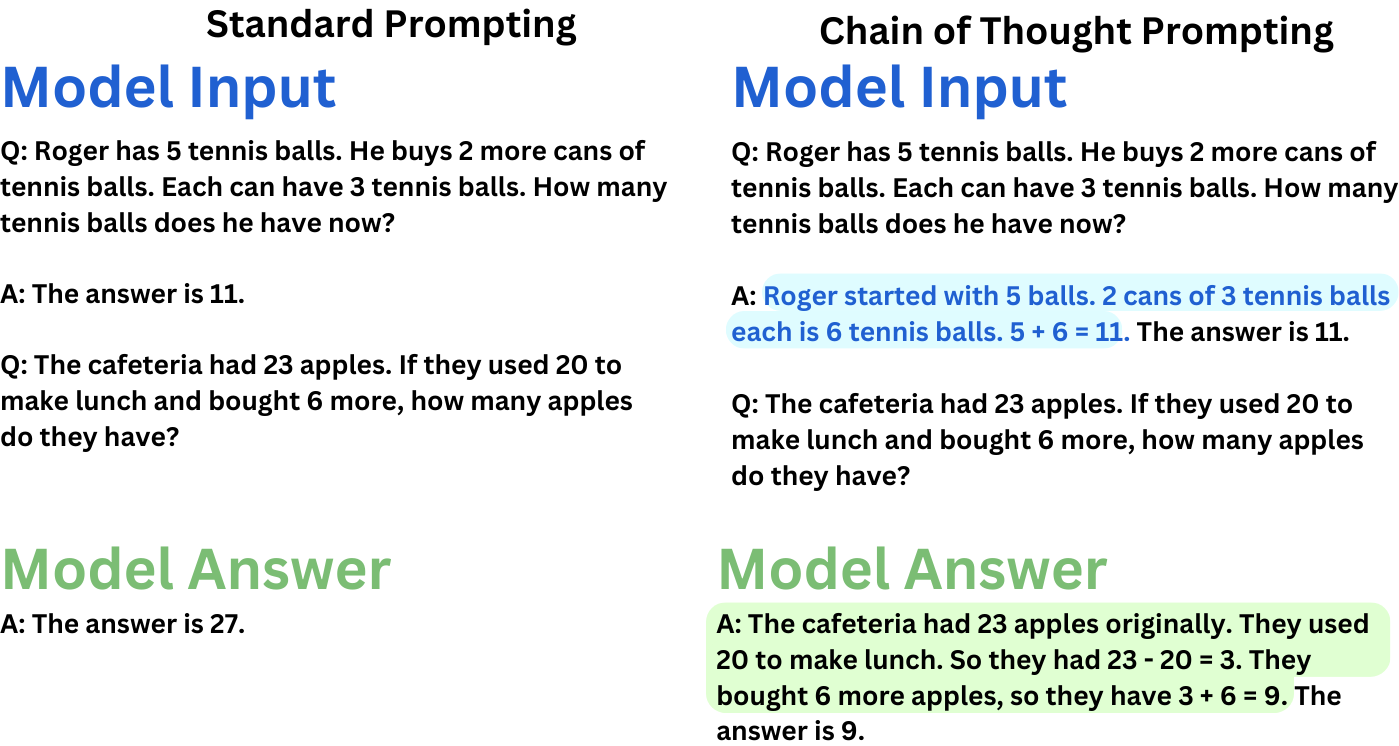

In [ ]:
import pandas as pd
file_path = ...
cot_df = pd.read_csv(file_path)
cot_df

In [ ]:
list(cot_df.T.to_dict().values())[0]

In [ ]:
import random
from langchain.prompts import (
    FewShotPromptTemplate,
    PromptTemplate
)
examples = random.sample(list(cot_df.T.to_dict().values()), 10)
template = """Question: {Question}Rationale: {Rationale}Response: {Response}"""
example_prompt = PromptTemplate(
    input_variables=["Question", "Rationale", "Response"],
    template=template
)
system_prompt = """You are provided with an arithmetic question. Your task is to compute the solution using the given arithmetic operations. The only arithmetic operators needed to answer the questions are'+'(addition) and'-'(subtraction). The answer should be correct to one decimal place."""
COT_prompt = FewShotPromptTemplate(
    prefix=system_prompt,
    example_prompt=example_prompt,
    examples=examples,
    suffix="Question: {input}",
    input_variables=['input']
)
print(COT_prompt.format(input='[EXAMPLE QUESTION]'))

In [ ]:
chain = LLMChain(
    llm=chat_model,
    prompt=COT_prompt,
    verbose=True
)
question = """Mandy made an apple pie. She used 0.6 tablespoon of cinnamon and 0.5 tablespoon of nutmeg. How much more cinnamon than nutmeg did Mandy use?"""
chain.run(question)

#Self consistency
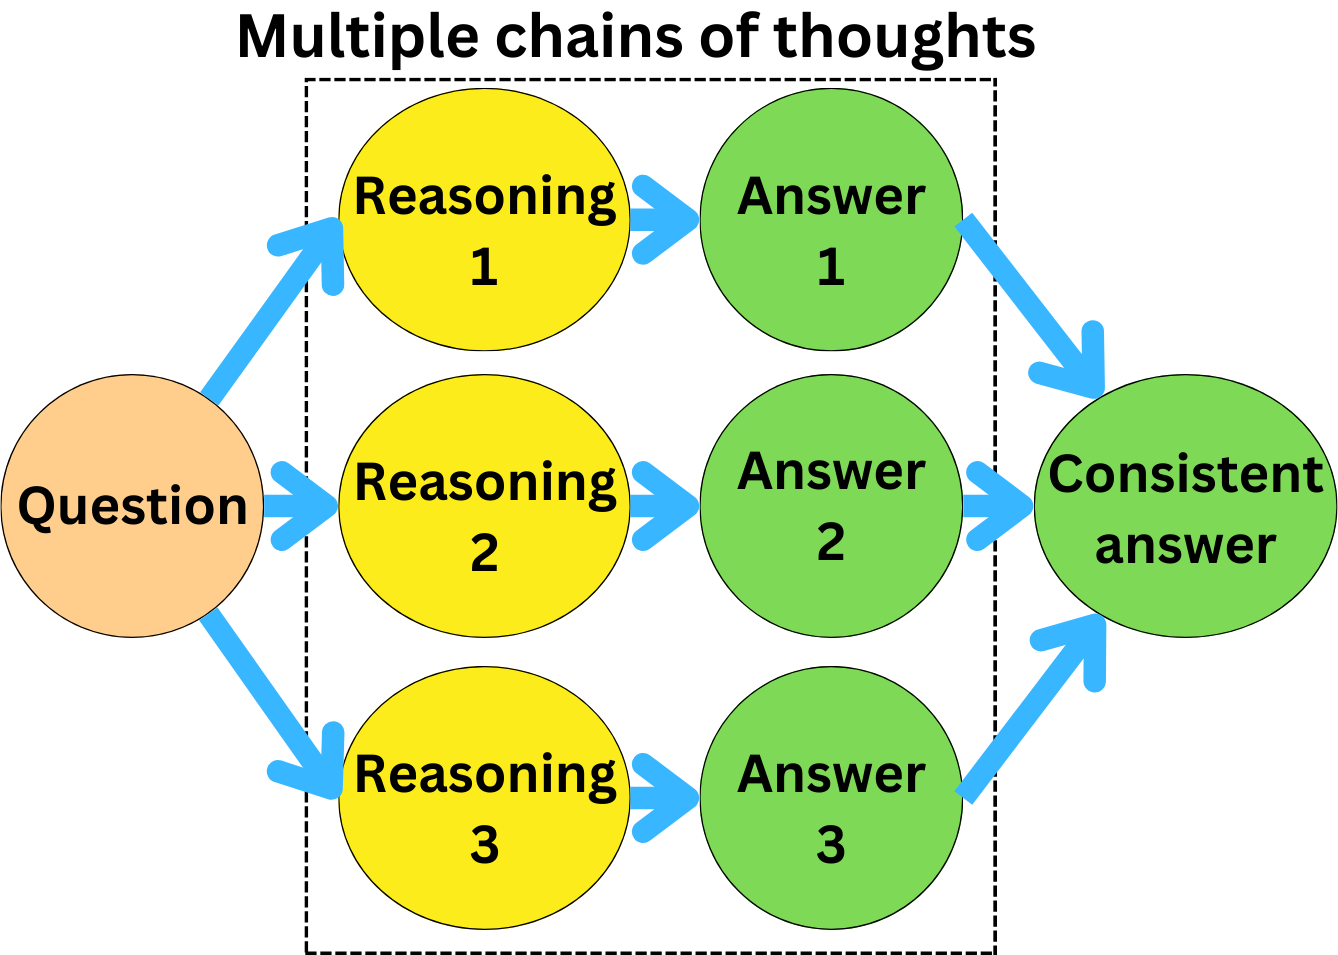

In [82]:
chat_model = ChatOpenAI(temperature=0.7)
cot_chain = LLMChain(
    llm=chat_model,
    prompt=COT_prompt,
    verbose=True
)
template = """Using the following answers, return the answer that comes up more often{answers}ANSWER:"""
consistency_prompt = PromptTemplate.from_template(template)
consistency_chain = LLMChain(
    llm=chat_model,
    prompt=consistency_prompt,
    verbose=True
)
question = """Mandy made an apple pie. She used 0.6 tablespoon of cinnamon and 0.5 tablespoon of nutmeg. How much more cinnamon than nutmeg did Mandy use?"""
responses = []
for i in range(10):
    response = cot_chain.run(question)
    responses.append(response)
answers = '\n\n'.join(responses)
consistency_chain.run(answers)

NameError: name 'COT_prompt' is not defined